In [5]:
from audio_analysis import AudioAnalyzer
from audio_helper import plot_audio_metrics_wide_layout
import torchaudio,torch
import os

## Impact of Noise addition on Audio Quality Metrics
Gaussian noise is added with weights as (0.01, 0.02, 0.03, 0.04, 0.05)

,Audio Name,MSE,PSNR,SSIM,Cosine Similarity,KL Divergence,Histogram Correlation
0,original_cropped.wav,0.000000,inf,1.000000,1.000000,0.000000,1.0
1,noise_level_1.wav,0.007761,85.142641,0.999994,0.999882,0.065648,1.0
2,noise_level_2.wav,0.036437,78.426347,0.999933,0.999448,0.240321,1.0
3,noise_level_3.wav,0.101020,73.997736,0.999691,0.998466,0.477220,1.0
4,noise_level_4.wav,0.233350,70.361757,0.999044,0.996527,0.733491,1.0
5,noise_level_5.wav,0.465206,67.365375,0.997799,0.993053,0.985788,1.0


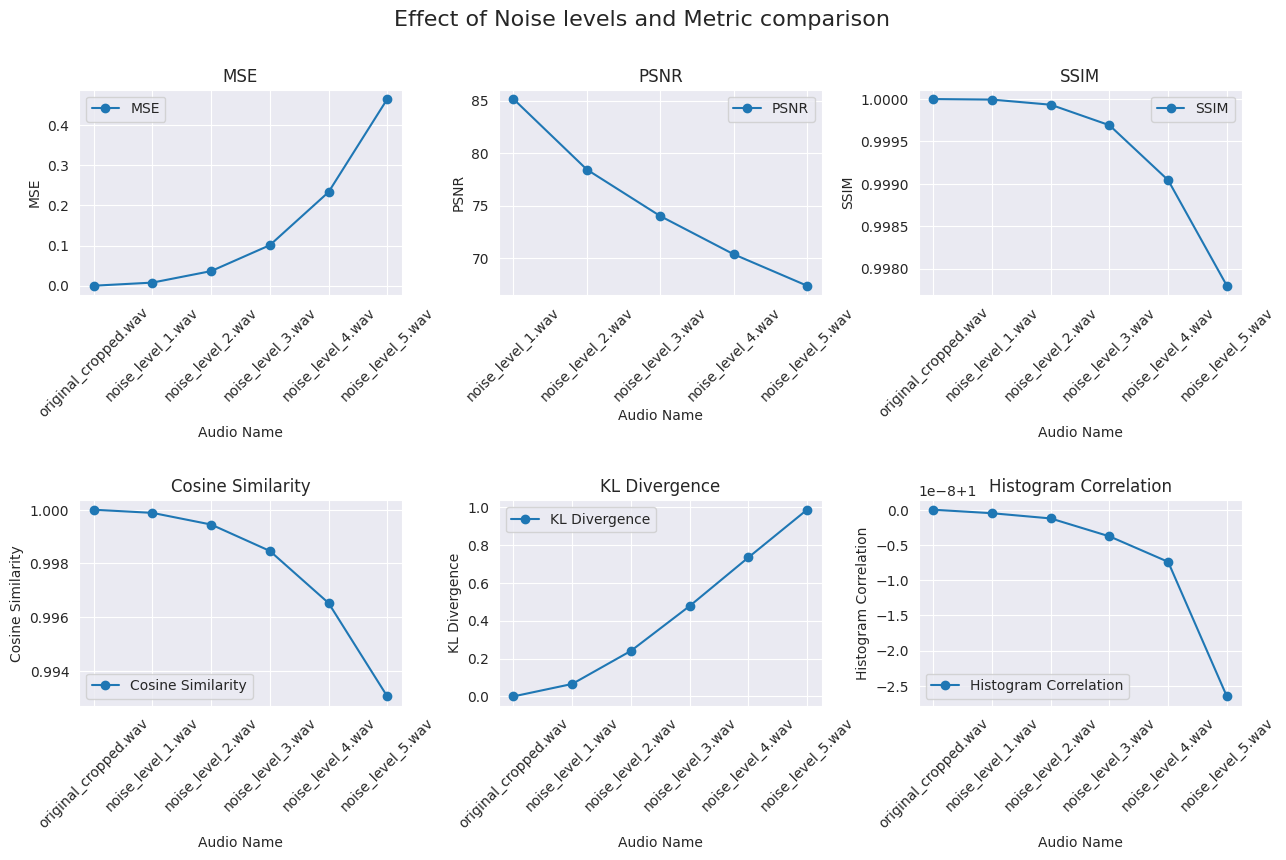

In [3]:

def add_noise_to_audio(file_path, noise_levels=[0.01, 0.02, 0.03, 0.04, 0.05]):
    """
    Adds noise at different levels to an audio file and saves the altered versions.

    Parameters:
        file_path (str): Path to the original audio file.
        noise_levels (list): A list of noise levels to apply to the audio file.
    """
    # Load the original audio
    waveform, sample_rate = torchaudio.load(file_path)

    # Directory to save altered audio files
    altered_dir = 'data/compare_altered_audio/noise'
    os.makedirs(altered_dir, exist_ok=True)

    file_paths = [file_path]  # Include original file path for comparison

    for i, level in enumerate(noise_levels):
        # Generate noise
        noise = torch.randn(waveform.size()) * level

        # Add noise to original waveform
        altered_waveform = waveform + noise

        # Save altered audio
        altered_file_path = os.path.join(altered_dir, f'noise_level_{i+1}.wav')
        torchaudio.save(altered_file_path, altered_waveform, sample_rate)
        file_paths.append(altered_file_path)

    return file_paths

# Example usage
original_file_path = 'data/altered_audio/original_cropped.wav'
file_paths = add_noise_to_audio(original_file_path)

# Now, use the AudioAnalyzer to analyze and compare the original and altered audio files
analyzer = AudioAnalyzer(file_paths)
analyzer.generate_spectrograms()
analyzer.populate_metrics_dataframe()

display(analyzer.df_metrics)
plot_audio_metrics_wide_layout(analyzer.df_metrics)

## Impact of Progressive Tone Alteration on Audio Quality Metrics
The graph depicts the degradation of audio fidelity with increasing tone levels, where each level represents a specific multiplier (1.2, 1.5, 2, 2.5, 5) applied to the original audio. The metrics—MSE, PSNR, SSIM, Cosine Similarity, KL Divergence, and Histogram Correlation—uniformly indicate a steep decline in audio quality and structural integrity, particularly at the highest tone level.

,Audio Name,MSE,PSNR,SSIM,Cosine Similarity,KL Divergence,Histogram Correlation
0,original_cropped.wav,0.000000,inf,1.000000,1.000000,0.000000e+00,1.000000
1,tone_level_1.wav,6.371118,55.999670,0.999617,1.000000,-2.192717e-07,1.000000
2,tone_level_2.wav,51.419762,46.930528,0.998632,1.000000,-4.621033e-07,1.000000
3,tone_level_3.wav,291.875214,39.389856,0.997498,0.999929,5.806782e-05,1.000000
4,tone_level_4.wav,801.758850,35.001390,0.996830,0.997212,1.371958e-03,1.000000
5,tone_level_5.wav,8279.608398,24.861729,0.994072,0.911596,4.601853e-02,0.999999


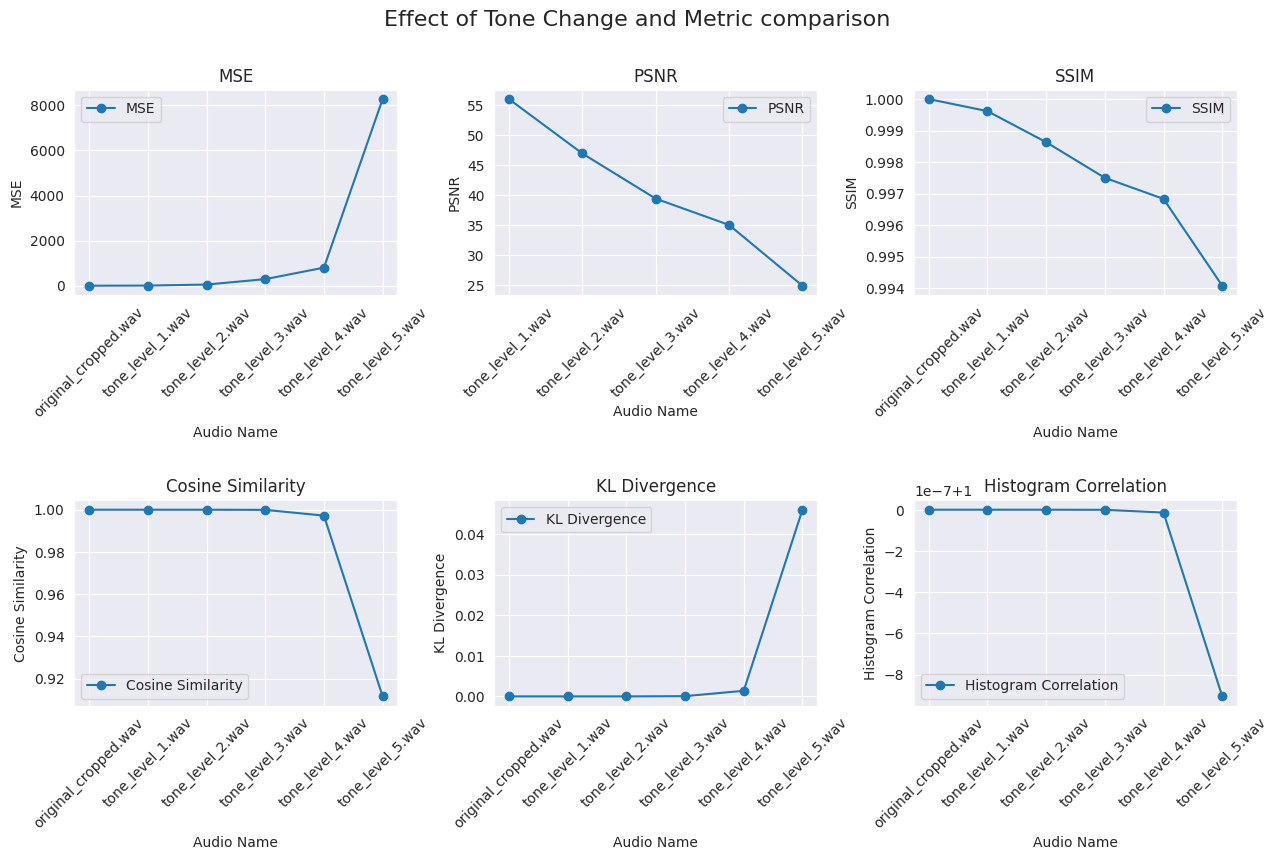

In [4]:
def change_tone(file_path, tone_levels=[1.2, 1.5,2,2.5,5]):
    """
    Changes the tone of an audio file by adjusting its amplitude and saves the altered versions.
    """
    waveform, sample_rate = torchaudio.load(file_path)
    altered_dir = 'data/compare_altered_audio/tone'
    os.makedirs(altered_dir, exist_ok=True)
    file_paths = [file_path]

    for i, level in enumerate(tone_levels):
        altered_waveform = waveform * level
        altered_file_path = os.path.join(altered_dir, f'tone_level_{i+1}.wav')
        torchaudio.save(altered_file_path, altered_waveform, sample_rate)
        file_paths.append(altered_file_path)
    
    return file_paths


# Example usage
original_file_path = 'data/altered_audio/original_cropped.wav'
file_paths = change_tone(original_file_path)

# Now, use the AudioAnalyzer to analyze and compare the original and altered audio files
analyzer = AudioAnalyzer(file_paths)
analyzer.generate_spectrograms()
analyzer.populate_metrics_dataframe()
display(analyzer.df_metrics)
plot_audio_metrics_wide_layout(analyzer.df_metrics,title='Effect of Tone Change and Metric comparison')

Based on the above graphs, here are some conclusions drawn:

- **MSE (Mean Squared Error):** There is a general trend of increasing MSE with each subsequent level of tone change, indicating that the changes are leading to greater deviation from the original audio.
  
- **PSNR (Peak Signal-to-Noise Ratio):** The PSNR decreases as the tone levels increase, which suggests that the quality of the audio is degrading in comparison to the original audio.

- **SSIM (Structural Similarity Index):** There is a gradual decrease in SSIM with more levels of tone change, implying that the structure of the audio signal is less similar to the original as the tone changes increase.

- **Cosine Similarity:** The similarity remains fairly stable until the "tone_level_4.wav" and then drops significantly at "tone_level_5.wav," suggesting a major change in the audio signal at this point.

- **KL Divergence (Kullback–Leibler Divergence):** The divergence remains low and fairly consistent across the tone levels until a spike at "tone_level_5.wav," indicating a significant difference in the distribution of the audio signal at this level compared to the original.

- **Histogram Correlation:** The correlation is stable until a sharp drop at "tone_level_5.wav," which might indicate a substantial change or loss of information in the audio signal at this level.

Overall, the graphs suggest that the first four levels of tone change have a progressively negative effect on the audio quality and similarity to the original, but this effect becomes markedly more significant at the fifth level of tone change.